# Case Study 3 - Email Spam

__Team Members:__ Amber Clark, Andrew Leppla, Jorge Olmos, Paritosh Rai

# Content
* [Business Understanding](#business-understanding)
    - [Scope](#scope)
    - [Introduction](#introduction)
    - [Methods](#methods)
    - [Results](#results)
* [Data Evaluation](#data-evaluation)
    - [Loading Data](#loading-data) 
    - [Data Summary](#data-summary)
    - [Missing Values](#missing-values)
    - [Exploratory Data Analysis (EDA)](#eda)
    - [Assumptions](#assumptions)
* [Model Preparations](#model-preparations)
    - [Proposed Method](#proposed-metrics)
    - [Evaluation Metrics](#evaluation-metrics)
    - [Feature Selection](#feature-selection)
* [Model Building & Evaluations](#model-building)
    - [Sampling Methodology](#sampling-methodology)
    - [Model](#model)
    - [Performance Analysis](#performance-analysis)
* [Model Interpretability & Explainability](#model-explanation)
    - [Examining Feature Importance](#examining-feature-importance)
* [Conclusion](#conclusion)
    - [Final Model Proposal](#final-model-proposal)
    - [Future Considerations and Model Enhancements](#model-enhancements)

# Business Understanding & Executive Summary <a id='business-understanding'/>

This case study involves a text analysis of several thousand emails to create a model that identifies spam. The final model uses a Naïve Bayes classification method to quickly identify spam with approximately 97% accuracy, 93% F1, and __XXXX__ seconds processing time.

### Introduction <a id='introduction'/>

Spam is a term for unsolicited email (and now other forms of messaging) that has plagued inboxes for virtually as long as email has existed. The spam originated from a song in Monty Python's Flying Circus with the lyric, "Spam spam spam spam, spam spam spam spam, lovely spam, wonderful spam." In this scene, a group of Vikings in a cafe are singing about the ubiquity of the canned meat product after World War II. [1]. The term fits well to describe the potentially overwhelming pervasive presence of these unwanted and often malicious emails.

According to spamlaws.com [2], 14.5 billion messages globally per day, i.e., approximately 45% of all emails (or more according to certain research firms) are considered spam. The United States is the number one generator of spam emails. The types of spam range from relatively harmless but annoying advertising (36%), some attempt to gather sensitive personal information, to malware that can install critically harmful programs capable of crashing networks or stealing data. Email filters designed to block or delete spam are essential and constantly tested by those trying to penetrate the inboxes of business and personal accounts over the globe. Even with these security measures in place, some research firms estimate that the annual losses due to productivity interruption and technical expenses to deal with spam amount to over $20 billion [2].

The case study analysis examines thousands of sample emails that have been identified as either everyday correspondence(ham) or spam and attempts to build a model that can classify the emails correctly using the email sample provided.

### Methods <a id='methods'/>

#### Data Wrangling
Data was provided in five (5) folders containing email text – spam, spam_2, easy_ham, easy_ham2, and hard_ham – to extract the information and construct the dataset that can be leveraged to identify the spam emails. Extracted features included: folder name (folder), mail originator (from), email subject (subject), and main message (body). 

To make the data more manageable and processable, data cleaning was carried out to remove html and xml tags, unwanted characters, and null/empty values (NaN) from the subject and main text. Data was split in training and test sets in a 70/30 ratio, respectively. Care was taken to manage the imbalance ratio of spam and ham in training and test sets. 

#### NLP and Naive Bayes
Data was processed using TFIDF (Term Frequency Inverse Data Frequency) to quantify and determine the rare words across the spam and ham emails in the training set for email body and subject. Gaussian Naive Bayes (GaussianNB) was used to build the model. Predicted outcomes of the train and test data set were compared with the actual outcomes.

The team decided to use NLP (Natural Language Processing) to read and identify the text in the email subject and body. Team performed cleanup efforts on unstructured text data and removed unwanted characters and symbols to create a structured alphanumeric data frame. 

The Naïve Bayes algorithm was used to classify the data. This classification technique works well when features predicting the target classification are assumed to be independent of each other, and it is a proven method for effectively classifying spam.  
#### DBSCAN
Density-Based Spatial Clustering of Applications with Noise (DBSCAN) algorithm was used to find associations and structures in the data that are challenging to find manually but are relevant and valuable to find patterns and predict trends. DBSCAN groups the data points close to each other based on the density and distance measured. It also identifies the outliers in low-density regions. In the case of email, it was able to identify closely related words and separate the noise or irrelevant words. This algorithm effectively manages outliers by detecting them and considering them as non-clusters (not able to cluster them). DBSCAN allows for easy execution of various distance measures. Cosine distance (1 - cosine similarity) measures the relationship of the angle between vectors, i.e., two overlapping vectors will have minimum values. Cosine distance works excellent with text. 

#### Metrics
The metrics used to evaluate model performance were accuracy, F1, and time to process. Time to process the emails was also considered an essential factor since spam should be predicted in real time. So, the team had to find the right balance between the three legs of stool (accuracy, F1, and time to process).  

By maximizing the F1 score, the model balances both recall and precision for the positive class to ensure right balance is achieved to minimize the ham being identified as Spam and Spam as ham as both can create challenge.   

##### Accuracy

Accuracy refers to the level of agreement between the actual measurement and the predicted value.

##### F1

F1 values depend on Precision and Recall. Precision and recall are useful metrics when the classes are imbalanced like in this dataset. These metrics are defined as follows:

Recall = TP/(TP+FN)
Precision = TP/(TP+FP)

Where:

- True Positive (TP) is "email is correctly predicted to be spam". These predictions will correctly identify spam mail.
- False Negative (FN) is "email is incorrectly predicting ham to be spam". These predictions would predict ham as spam.
- False Positive (FP) is "email is incorrectly predicting ham to be spam". These predictions would identify ham as spam.

Both Recall and Precision focus the modeling on True Positives, but Recall is penalized by False Negatives whereas Precision is penalized by False Positives. 

To balance both precision and recall, the team used the F1 score. The F1 score combines precision and recall into a single metric by taking their harmonic mean:

F1 = 2 * Recall * Precision / (Recall + Precision)

In the absence of stakeholder guidance, the team chose this balanced approach to misclassification.  

##### Processing Time
The time to process the email is calculated for each model. The team tuned the number of features in the Naïve Bayes model to optimize the processing time and prevent over fitting.

#### Modeling Objective

The team's objective was to maximize __accuracy__ and __F1__ while minimizing the __processing time__ to make predictions in real time.

### Results <a id='results'/>

The best model had an accuracy of 97%, F1-score of 93%, and processing time* of __XXX__ seconds (so fast!).  This model used only 5% of the features from the email subject+body with __XXXX__ total features.

*processing time depends on the machine

| Type         | Percentile | No of Features | Train Accuracy | Test Accuracy | f1-score | Processing Time |
|--------------|------------|----------------|----------------|---------------|----------|-----------------|
| body         | 100        | 77396          | 0.95           | 0.93          | 0.83     | 7.9631          |
| subject      | 100        | 6086           | 0.96           | 0.92          | 0.81     | 0.8683          |
| subject      | 1          | 59             | 0.8            | 0.8           | 0.37     | 0.0195          |
| body         | 1          | 773            | 0.94           | 0.93          | 0.85     | 0.0861          |
| body         | 0.1        | 78             | 0.83           | 0.83          | 0.52     | 0.0175          |
| __subject+body__ | __1__          | __832__            | __0.94__           | __0.94__          | __0.88__     | __0.103__           |
| subject+body | 0.1        | 84             | 0.84           | 0.84          | 0.55     | 0.0138          |

# Data Engineering <a id='data-evaluation'>
    

## Data Summary

Data was provided in five (5) folders containing email text – spam, spam_2, easy_ham, easy_ham2, and hard_ham – to extract the information to construct the dataset that can be leveraged to identify the spam emails. Empty email data frame was created with folder name (folder), mail originator (from), email subject (subject), and main message (body). Email from the five (5) folders listed above was extracted and parsed under the respective column into the email data frame.

In [1]:
# standard libraries
import pandas as pd
import numpy as np
import re
import os
from IPython.display import Image
import sklearn
import time
# email
from email import policy
from email.parser import BytesParser

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tabulate import tabulate
from collections import defaultdict
from collections import  Counter

# data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_extraction.text import TfidfVectorizer

# clustering
from sklearn.cluster import DBSCAN
from statistics import stdev

# prediction models
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# import warnings filter
import warnings
warnings.filterwarnings('ignore')
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)

### Loading Data and Cleanup <a id='loading-data'>

As part of data cleanup, team removed HTML tags, stop words, and non-alphanumeric characters.

In [2]:
import os
notebook_path = os.path.abspath('ds7333_case_study_3')

In [3]:
file_spam = os.path.join(os.path.dirname(notebook_path), "SpamAssassinMessages")

In [4]:
def get_all_files(folder):
    file_list = []
    if os.path.exists(folder):
        for root, dirs, files in os.walk(folder):
            for file in files:
                file_list.append(os.path.join(root,file))
    return file_list

In [5]:
folders = os.listdir(file_spam)
# Get the file names in each folder (list of lists)
files = [ os.listdir(file_spam+ '/'+ folder) for folder in folders] 

# Create a list of dataframes for all of the folders
emails = [ pd.DataFrame({'folder' : [], 'from' : [], 'subject' : [], 'body': []}) ]*len(folders)

# Add folder path to file names
for i in range(0,len(folders)):
    for j in range(0, len(files[i])):
        files[i][j] = str(file_spam +'/' + folders[i] + '/' + files[i][j]) 
        
        # Parse and extract email 'subject' and 'from'
        with open(files[i][j], 'rb') as fp:
            msg = BytesParser(policy=policy.default).parse(fp)
            
            # Error checking when reading in body for some html-based emails from spam folders
            try:
                simplest = msg.get_body(preferencelist=('plain', 'html'))
                try:
                    new_row = {'folder': folders[i], 'from': msg['from'], 'subject': msg['subject'], 'body': simplest.get_content()}
                    emails[i] = emails[i].append(new_row, ignore_index=True)
                except:
                    new_row = {'folder': folders[i], 'from': msg['from'], 'subject':msg['subject'], 'body':'Error(html)'}
                    emails[i] = emails[i].append(new_row, ignore_index=True)
            except:
                new_row = {'folder': folders[i], 'from': msg['from'], 'subject':msg['subject'], 'body':'Error(html)'}
                emails[i] = emails[i].append(new_row, ignore_index=True)

In [6]:
# Emails per folder
print("# files in folders:", [len(i) for i in files])
print("# emails read in  :", [i.shape[0] for i in emails])

# Total emails
print( "\n# total emails =", sum([len(i) for i in files]) )

# files in folders: [5052, 1401, 501, 1001, 1398]
# emails read in  : [5052, 1401, 501, 1001, 1398]

# total emails = 9353


In [7]:
# Create single dataframe from all folders
df = pd.concat( [emails[i] for i in range(0, len(emails))], axis=0)

#  Keep the indices from the folders
df = df.reset_index() 

# create response column from folder names
spam = [(i=='spam' or i=='spam_2') for i in df['folder']]
df = pd.concat([df, pd.Series(spam).astype(int)], axis=1)

df.columns = ['folder_idx', 'folder', 'from', 'subject', 'body','spam']

df.shape

(9353, 6)

In [8]:
html_regex = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
def cleanhtml(raw_html):
    cleantext = re.sub(html_regex, '', raw_html)
    return cleantext

In [9]:
def cleanAndSplit(raw_text): 
    temp = []
    for word in raw_text.split():
        temp.append(re.sub(r"[^a-zA-Z0-9]","",word).lower())
    return temp

In [10]:
def cleanBody(raw_content):
    if(pd.isna(raw_content)):
        return []
    clean_from_html = cleanhtml(raw_content)
    out = cleanAndSplit(clean_from_html)
    return out

In [11]:
def combine(content):
    joined = np.concatenate((*content[['clean_body']], *content[['clean_subject']]))
    return joined

In [12]:
df['clean_body'] = df['body'].apply(cleanBody)
df['clean_subject'] = df['subject'].apply(cleanBody)
df['joined'] = df[['clean_body','clean_subject']].agg(combine, axis=1)

In [13]:
df.head()

,folder_idx,folder,from,subject,body,spam,clean_body,clean_subject,joined
0,0,easy_ham,Robert Elz <kre@munnari.OZ.AU>,Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0,"[date, wed, 21, aug, 2002, 105446, 0500, from,...","[re, new, sequences, window]","[date, wed, 21, aug, 2002, 105446, 0500, from,..."
1,1,easy_ham,Steve Burt <Steve_Burt@cursor-system.com>,[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Gre...",0,"[martin, a, posted, tassos, papadopoulos, the,...","[zzzzteana, re, alexander]","[martin, a, posted, tassos, papadopoulos, the,..."
2,2,easy_ham,Tim Chapman <timc@2ubh.com>,[zzzzteana] Moscow bomber,Man Threatens Explosion In Moscow \n\nThursday...,0,"[man, threatens, explosion, in, moscow, thursd...","[zzzzteana, moscow, bomber]","[man, threatens, explosion, in, moscow, thursd..."
3,3,easy_ham,Monty Solomon <monty@roscom.com>,[IRR] Klez: The Virus That Won't Die,Klez: The Virus That Won't Die\n \nAlready the...,0,"[klez, the, virus, that, wont, die, already, t...","[irr, klez, the, virus, that, wont, die]","[klez, the, virus, that, wont, die, already, t..."
4,4,easy_ham,Stewart Smith <Stewart.Smith@ee.ed.ac.uk>,Re: [zzzzteana] Nothing like mama used to make,"> in adding cream to spaghetti carbonara, whi...",0,"[, in, adding, cream, to, spaghetti, carbonara...","[re, zzzzteana, nothing, like, mama, used, to,...","[, in, adding, cream, to, spaghetti, carbonara..."


## Missing Values <a id='missing-values'>

There were 12 emails with missing subjects.  In addition, 33 of approximately 9,000 emails (less than .5%) that the team was not able to read in for modeling and analysis.  These 33 emails were a small subset of the html emails.  Missing values were replaced with "No Subject" for subject and "Error(html)" for body.  A missing subject is important to identify spam emails, and these complicated html emails were also all spam.    

In [14]:
# Rows where body couldn't be read in = 'Error(html)'
df.loc[df['body']=='Error(html)']

# All spam emails

,folder_idx,folder,from,subject,body,spam,clean_body,clean_subject,joined
7191,237,spam,eb@via.ecp.fr,"Over $100,000 Per Year Possible On The Net! N...",Error(html),1,[errorhtml],"[over, 100000, per, year, possible, on, the, n...","[errorhtml, over, 100000, per, year, possible,..."
7303,349,spam,"""Books@Books""@BlackRealityPublishing.com","Free Excerpt; Baby Makers, Loser Choosers, & ...",Error(html),1,[errorhtml],"[free, excerpt, baby, makers, loser, choosers,...","[errorhtml, free, excerpt, baby, makers, loser..."
7379,425,spam,zzzz@netscape.net,Collect Your Money! Time:1:30:33 AM,Error(html),1,[errorhtml],"[collect, your, money, time13033, am]","[errorhtml, collect, your, money, time13033, am]"
7466,512,spam,Affordable Computer Supply <InkjetDeals@acsmsu...,Printer Cartridges as low as $1.21 each!,Error(html),1,[errorhtml],"[printer, cartridges, as, low, as, 121, each]","[errorhtml, printer, cartridges, as, low, as, ..."
7679,725,spam,eb@via.ecp.fr,"Over $100,000 Per Year Possible On The Net! N...",Error(html),1,[errorhtml],"[over, 100000, per, year, possible, on, the, n...","[errorhtml, over, 100000, per, year, possible,..."
7782,828,spam,"""Books@Books""@BlackRealityPublishing.com","Free Excerpt; Baby Makers, Loser Choosers, & ...",Error(html),1,[errorhtml],"[free, excerpt, baby, makers, loser, choosers,...","[errorhtml, free, excerpt, baby, makers, loser..."
7852,898,spam,zzzz@netscape.net,Collect Your Money! Time:1:30:33 AM,Error(html),1,[errorhtml],"[collect, your, money, time13033, am]","[errorhtml, collect, your, money, time13033, am]"
7931,977,spam,Affordable Computer Supply <InkjetDeals@acsmsu...,Printer Cartridges as low as $1.21 each!,Error(html),1,[errorhtml],"[printer, cartridges, as, low, as, 121, each]","[errorhtml, printer, cartridges, as, low, as, ..."
7956,1,spam_2,lmrn@mailexcite.com,"Real Protection, Stun Guns! Free Shipping! Ti...",Error(html),1,[errorhtml],"[real, protection, stun, guns, free, shipping,...","[errorhtml, real, protection, stun, guns, free..."
7957,2,spam_2,amknight@mailexcite.com,"New Improved Fat Burners, Now With TV Fat Abso...",Error(html),1,[errorhtml],"[new, improved, fat, burners, now, with, tv, f...","[errorhtml, new, improved, fat, burners, now, ..."


In [15]:
# Count of body read Errors
df.loc[df['body']=='Error(html)'].shape[0]

33

In [16]:
df.isna().sum()

folder_idx        0
folder            0
from              5
subject          12
body              0
spam              0
clean_body        0
clean_subject     0
joined            0
dtype: int64

In [17]:
# Replace NaN and None values with 'No Subject'
df.loc[ df['subject'].isna(), 'subject'] = 'No Subject'
df.loc[ df['subject']=='', 'subject'] = 'No Subject'

## Exploratory Data Analysis (EDA) <a id='eda'>

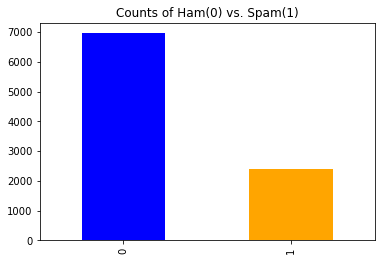

In [18]:
count_Class=pd.value_counts(df["spam"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Counts of Ham(0) vs. Spam(1)')
plt.show()

In [19]:
def dummy_fun(doc):
    return doc

vectorizer = TfidfVectorizer(analyzer='word', tokenizer=dummy_fun, preprocessor=dummy_fun, token_pattern=None, stop_words='english');

In [20]:
def sorted_vector_features(features):
    vectors = pd.DataFrame( features.toarray(), columns = vectorizer.get_feature_names() )
    vector_words = pd.Series(vectors.columns)
    vector_means = pd.Series( [np.mean(vectors[i]) for i in vectors.columns] )
    vector_df = pd.concat([vector_words, vector_means], axis=1)
    vector_df.columns = ['word','mean tdidf']
    vector_sorted = vector_df.sort_values(by='mean tdidf', ascending=False)
    return vector_sorted

In [21]:
features_subject = vectorizer.fit_transform(df['clean_subject'])
subject_vector_sorted = sorted_vector_features(features_subject)

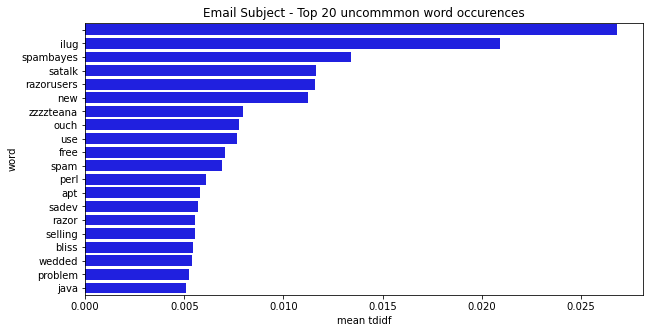

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(data = subject_vector_sorted.head(20), x='mean tdidf',y='word', color='blue')
plt.title('Email Subject - Top 20 uncommmon word occurences')
plt.show()

In [23]:
features_body = vectorizer.fit_transform(df['clean_body'])
body_vector_sorted = sorted_vector_features(features_body)

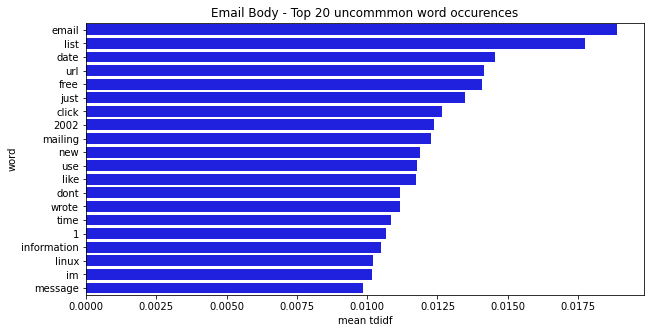

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(data = body_vector_sorted.iloc[1:21], x='mean tdidf',y='word', color='blue')
plt.title('Email Body - Top 20 uncommmon word occurences')
plt.show()

### Clustering
- Use DBSCAN with cosine distance for NLP.  
- Try to get approx. 5 clusters to dissect and explain
- Look for descriptors for the clusters, like business vs. personal emails, IT emails, etc.

### Todo: Highlight first row

In [25]:
dbscan = DBSCAN(metric='cosine')
eps_clusters = []

for j in range(75,126,25):
    dbscan.min_samples = j
    for i in range(60,76,5):
        dbscan.eps = i/100
        clustering = pd.Series( dbscan.fit_predict(features_subject) )
        
        cluster_counts = list( clustering.value_counts().sort_index() )
        cluster_counts.pop(0) # remove -1 cluster which is a non-cluster 
        num_clusters = len(cluster_counts)
        
        clustering_spam = pd.concat([clustering, df['spam']], axis=1)
        clustering_spam.columns = ['cluster', 'spam']       
        clustering_spam_counts = pd.DataFrame( clustering_spam.value_counts() ).reset_index()
        cluster_purity = list( ( clustering_spam_counts[['cluster']].value_counts()==1 ).sort_index() )
        cluster_purity.pop(0) # remove -1 cluster which is a non-cluster
        num_pure_clusters = sum(cluster_purity)
        num_pure_emails = sum( np.multiply(cluster_counts, cluster_purity) )
        
        eps_clusters.append([ dbscan.min_samples, dbscan.eps, num_clusters, num_pure_clusters, num_pure_emails])

clusters_df = pd.DataFrame(eps_clusters, columns = ['min_samples','epsilon', '# clusters', '# pure clusters', '# pure emails'])
clusters_df.sort_values(by='# pure emails', ascending=False)

,min_samples,epsilon,# clusters,# pure clusters,# pure emails
10,125,0.70,6,4,577
2,75,0.70,8,5,571
11,125,0.75,6,3,548
7,100,0.75,6,3,542
6,100,0.70,6,3,433
0,75,0.60,4,3,327
3,75,0.75,5,2,300
5,100,0.65,4,2,245
9,125,0.65,4,2,245
4,100,0.60,3,2,242


## Final Clusters - Insights

min_samples=125, epsilon=0.70 had 4 pure clusters that contained only 'ham' emails.  These clusters could be used to filter or pre-process emails before Naive Bayes classification.  

### Todo: Update cluster descriptions

- Cluster 0 : News & Dates
- Cluster 1 : Pain (ouch, hurts)
- Cluster 2 : Unknown
- Cluster 3 : spam
- Cluster 4 : [Spambayes] & package
- Cluster 5 : [zzzzteana]

min_samples could be decreased to 50 or less which would give more pure emails but many more clusters to explore and manage.  

In [26]:
# Most clusters with the lowest spread (stdev) in cluster counts
dbscan.min_samples = 125
dbscan.eps = 0.70

clusters = dbscan.fit_predict(features_subject)
clusters = pd.Series(clusters)
clusters.index = df.index
subject_clusters = pd.concat([ clusters, df['subject'], df['spam'] ], axis=1)
subject_clusters.columns = ['cluster','subject', 'spam']

heads_tails = pd.DataFrame({'cluster' : [], 'subject' : [], 'spam' : []}) 
for i in range( 0, max(clusters.unique())+1 ): # Exclude the -1 class which is a non-cluster
    heads_tails = pd.concat([heads_tails, 
                             subject_clusters.loc[subject_clusters['cluster']==i].head(3),
                             subject_clusters.loc[subject_clusters['cluster']==i].tail(3) ], axis=0)
heads_tails[['cluster', 'spam']] = heads_tails[['cluster','spam']].astype(int)
print('Head & tail of each cluster:')    
heads_tails

Head & tail of each cluster:


,cluster,subject,spam
65,0,[use Perl] Headlines for 2002-08-30,0
69,0,"NTK Now, 2002-08-30",0
140,0,[use Perl] Headlines for 2002-10-08,0
6432,0,[use Perl] Stories for 2002-08-20,0
6661,0,[use Perl] Stories for 2002-08-18,0
6878,0,[use Perl] Stories for 2002-08-18,0
329,1,"Re: ""Ouch. Ouch. Ouch. Ouch. Ouch....""(was Re:...",0
340,1,"Re: ""Ouch. Ouch. Ouch. Ouch. Ouch....""(was Re:...",0
467,1,Ouch...,0
5915,1,Re: My brain hurts,0


### 111 spam cases, most in Cluster 2.  Clusters 0,1,4, and 5 have no spam and can be used for filtering or pre-processing

In [27]:
subject_clusters.loc[subject_clusters['cluster']!=-1,'spam'].value_counts()

0    956
1    111
Name: spam, dtype: int64

In [28]:
subject_clusters.loc[subject_clusters['cluster']==2,'spam'].value_counts()

0    127
1    108
Name: spam, dtype: int64

In [29]:
subject_clusters.loc[subject_clusters['cluster']==3,'spam'].value_counts()

0    252
1      3
Name: spam, dtype: int64

## Assumptions <a id='assumptions'>

Team made the assumption that emails are representative of future emails.  Team also made the assumption that the emails were properly categorized into folders as ham or spam.  For the spam detection to be effective, the model will need to be run and/or updated on a regular basis to ensure new trends in spam are captured.

Naive Bayes is built with the assumption that all prediction variables(features) are independent.

# Model Preparations <a id='model-preparations'/>

### Methods 

For this classification problem, team found NLP useful for modeling because it is used for natural language processing.  (A natural language is one that develops naturally such as English, ASL, or Spanish.  An example of an artificial language is Klingon.)  Naïve Bayes was useful for classification because it looks at each classification individually.  It is the most popular method for spam detection because it gives a low result of false positive.  The dataset started with 6,086 features.  NLP only needed a fraction of the features in order to detect whether a message was spam or ham.  DBSCAN was useful for finding connections in the  data such as related words and noise.

#### NLP and Naïve Bayes
Data was processed using TFIDF (Term Frequency Inverse Data Frequency) to quantify and determine the rare words across the spam and ham emails in the training set for email body and subject. Gaussian Naive Bayes (GaussianNB) was used to build the model. Predicted outcomes of the train and test data set were compared with the actual outcome.

The team decided to use NLP (Natural Language Processing) to read and identify the text in the email subject and body. Team performed cleanup efforts on unstructured text data and removed unwanted characters and symbols to create a structured alphanumeric data frame. 

The Naïve Bayes algorithm was used to classify the data. This classification technique works well when features predicting the target classification are independent of each other, and it is a proven method for effectively classifying spam.  

#### DBSCAN
Density-Based Spatial Clustering of Applications with Noise (DBSCAN) algorithm is used to find associations and structures in data that are challenging to find manually but are relevant and valuable to find patterns and predict trends. DBSCAN groups the data points close to each other based on the density and distance measured. It also identifies the outliers in low-density regions. In the case of email, it will be able to identify closely related words and separate the noise or irreverent words. This algorithm effectively manages outliers by detecting them and considering them as a separate (not able to cluster them) cluster(s). DBSCAN allows for easy execution of distance measures. Cosine distance measures the distance between vectors by calculating cosine angle vectors, i.e., two overlapping vectors will have minimum values. Cosine distance works excellent with text. 

#### Metrics
The metrics used to evaluate model performance were accuracy, time to process, and F1. Time to process the emails was also considered to be an essential factor. So, the team had to find the right balance between the three legs of stool (accuracy, time to process, and F1).

Accuracy refers to the level of agreement between the actual measurement and the predicted value.

# Model Building & Evaluations <a id='model-building'/>

Clustering with DBSCAN approach is discussed in the EDA section above.

## Split into Training and Test

Data was split into training and test sets with a 70/30 ratio, respectively. Care was taken to manage the imbalance of spam and ham in the training and test sets. Specifically, StratifiedShuffleSplit was used to ensure class balance.

In [30]:
def split_dependant_and_independant_variables(df: pd.DataFrame, y_var: str):
    X = df.copy()
    y = X[y_var]
    X = X.drop([y_var], axis=1)
    return X, y

In [31]:
def shuffle_split(X, y, test_size, random_state):
    stratified_shuffle_split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
    for train_index, test_index in stratified_shuffle_split.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
    return X_train, X_test, y_train, y_test

In [32]:
X, y = split_dependant_and_independant_variables(df, 'spam')

In [33]:
X_train, X_test, y_train, y_test = shuffle_split(X, y, test_size=0.3, random_state=12343)

In [34]:
vectorizer_subj = TfidfVectorizer(analyzer='word', tokenizer=dummy_fun, preprocessor=dummy_fun, token_pattern=None, stop_words='english')
features_subject_train = vectorizer_subj.fit_transform(X_train['clean_subject'])
features_subject_test = vectorizer_subj.transform(X_test['clean_subject'])

In [35]:
vectorizer_body = TfidfVectorizer(analyzer='word', tokenizer=dummy_fun, preprocessor=dummy_fun, token_pattern=None, stop_words='english')
features_body_train = vectorizer_body.fit_transform(X_train['clean_body'])
features_body_test = vectorizer_body.transform(X_test['clean_body'])

In [36]:
from scipy import sparse
features_joined_train = sparse.hstack((features_subject_train, features_body_train), format='csr') 
features_joined_test = sparse.hstack((features_subject_test, features_body_test), format='csr') 

## Feature Selection
Using all the extracted features resulting in overfitting the training set, longer processing time and degredation in F1 value.  To mitigate these issues, the team reduced the number of features in the model utilzing Select Percentile from Sklearn feature selection. Multiple iterations were done to reduce the features from 100% to 50% to 5% to 1%.  A subset of these iterations was included in this report.  The team found only 5% of the features was best for predicting spam without overfitting.  This reduction of features drastically improved the processing time (~__XXXX__ times as fast).

In [37]:
selector_100_subj = SelectPercentile(f_classif, percentile=100)
selector_100_subj.fit(features_subject_train, y_train)

selector_100_body = SelectPercentile(f_classif, percentile=100)
selector_100_body.fit(features_body_train, y_train)

SelectPercentile(percentile=100)

In [38]:
percentile = 5

In [39]:
selector_5_subj = SelectPercentile(f_classif, percentile=percentile)
selector_5_subj.fit(features_subject_train, y_train)
features_subject_train_sel = selector_5_subj.transform(features_subject_train).toarray()
features_subject_test_sel = selector_5_subj.transform(features_subject_test).toarray()

In [40]:
def selected_features(vectorizer, selector):
    words = np.array( vectorizer.get_feature_names() )
    selected = selector.get_support()
    p_values = selector.pvalues_
    selected_words = np.vstack([words, selected, p_values])
    selected_words = pd.DataFrame(selected_words).T
    selected_words.columns = ['word', 'selected?', 'p_value']
    selected_words['p_value'] = selected_words['p_value'].astype(float)
    selected_words = selected_words.loc[selected_words['selected?']=='True'].sort_values(by='p_value')
    return selected_words.drop('selected?', axis=1)

In [41]:
subj_5pct = selected_features(vectorizer_subj, selector_5_subj)
subj_5pct.head()

,word,p_value
2254,free,4.758619e-64
582,adv,6.345606e-50
3502,mortgage,6.224601e-32
0,,1.540961e-31
4298,rates,3.312160e-29


In [42]:
selector_5_body = SelectPercentile(f_classif, percentile=percentile)
selector_5_body.fit(features_body_train, y_train)
features_body_train_sel = selector_5_body.transform(features_body_train).toarray()
features_body_test_sel = selector_5_body.transform(features_body_test).toarray()

In [43]:
body_5pct = selected_features(vectorizer_body, selector_5_body)
body_5pct.head()

,word,p_value
24827,click,0.000000e+00
66809,receive,1.424765e-205
35436,free,9.865559e-176
67575,removed,1.418624e-171
82707,wish,1.662736e-150


In [44]:
selector_5_joined = SelectPercentile(f_classif, percentile=percentile)
selector_5_joined.fit(features_joined_train, y_train)
features_joined_train_sel = selector_5_joined.transform(features_joined_train).toarray()
features_joined_test_sel = selector_5_joined.transform(features_joined_test).toarray()

In [72]:
def selected_joined_features(vectorizer1, vectorizer2, selector):
    words1 = np.array( vectorizer1.get_feature_names() )
    words2 = np.array( vectorizer2.get_feature_names() )
    words = np.hstack([words1, words2])
    selected = selector.get_support()
    p_values = selector.pvalues_
    selected_words = np.vstack([words, selected, p_values])
    selected_words = pd.DataFrame(selected_words).T
    selected_words.columns = ['word', 'selected?', 'p_value']
    selected_words = selected_words.loc[selected_words['selected?']=='True']
    selected_words['p_value'] = selected_words['p_value'].astype(float)
    selected_words_sort = selected_words.sort_values(by='p_value')
    return selected_words_sort.drop('selected?', axis=1), selected_words['word']

In [73]:
joined_5pct = selected_joined_features(vectorizer_subj, vectorizer_body, selector_5_joined)
joined_5pct[0].head()

,word,p_value
30718,click,0.000000e+00
72700,receive,1.424765e-205
41327,free,9.865559e-176
73466,removed,1.418624e-171
88598,wish,1.662736e-150


In [74]:
# Kept words for 5% of subject + body features
joined_5pct[1]

0                      
44                  100
47               100000
77                   11
102               12304
              ...      
90137            zealot
90167          zerocost
90239               zip
90409             zyban
90426    zzzzexamplecom
Name: word, Length: 4521, dtype: object

## Modeling

Model Performance is discussed in the conclusion.

### Baseline Accuracy
If the model simply predicted everything as ham, it would be 74% accurate.  

In [47]:
# Baseline accuracy of 74% with class imbalance
df['spam'].value_counts(normalize=True)

0    0.743505
1    0.256495
Name: spam, dtype: float64

In [48]:
def score_feature_importance(model, vectorizer, selector, indicator):
    try:
        words = np.array( vectorizer.get_feature_names() )
        selected = selector.get_support()
        selected_words = np.vstack([words,  selected])
        selected_words = pd.DataFrame(selected_words).T
        selected_words.columns = ['word', 'selected?']
        selected_words = selected_words.loc[selected_words['selected?']=='True']['word']
    except: # body+subj models
        selected_words = joined_5pct[1]
    return sorted(list(zip(selected_words, model.feature_log_prob_[indicator])), key=lambda t: t[1], reverse=True)

def measure_time(func, name, percentile, features, vectorizer, selector):
    start = time.process_time()
    train_pred, test_pred, model = func()
    processing_time = time.process_time() - start
    return [name, percentile, features, round(accuracy_score(y_train, train_pred),2), round(accuracy_score(y_test, test_pred), 2), round(f1_score(y_test, test_pred),2), round(processing_time, 4)], score_feature_importance(model, vectorizer, selector, 0)[:50], score_feature_importance(model, vectorizer, selector, 1)[:50]

## Naïve Bayes
The Naïve Bayes algorithm was used to classify the data. This classification technique works well when features predicting the target classification are independent of each other, and it is a proven method for effectively classifying spam.  

### Modeling with All Body Features - Baseline Model #1

In [49]:
features_body_train_all = features_body_train.toarray()
features_body_test_all = features_body_test.toarray()
def run_model0(): 
    model0 = MultinomialNB()
    model0.fit(features_body_train_all, y_train)
    train_pred = model0.predict(features_body_train_all)
    test_pred = model0.predict(features_body_test_all)
    return train_pred, test_pred, model0

### Modeling with All Subject Features - Baseline Model #2

In [50]:
features_subject_train_all = features_subject_train.toarray()
features_subject_test_all = features_subject_test.toarray()
def run_model1(): 
    model1a = MultinomialNB()
    model1a.fit(features_subject_train_all, y_train)
    train_pred = model1a.predict(features_subject_train_all)
    test_pred = model1a.predict(features_subject_test_all)
    return train_pred, test_pred, model1a

### Modeling with 5% of Subject Features

In [51]:
def run_model2():
    model1b = MultinomialNB()
    model1b.fit(features_subject_train_sel, y_train)
    train_pred = model1b.predict(features_subject_train_sel)
    test_pred = model1b.predict(features_subject_test_sel)
    return train_pred, test_pred, model1b

### Modeling with 5% of Body Features

In [52]:
def run_model3():
    model2 = MultinomialNB()
    model2.fit(features_body_train_sel, y_train)
    train_pred = model2.predict(features_body_train_sel)
    test_pred = model2.predict(features_body_test_sel)
    return train_pred, test_pred, model2

### Modeling with 1% of Body Features

In [53]:
selector_1_body = SelectPercentile(f_classif, percentile=1)
selector_1_body.fit(features_body_train, y_train)
features_body_train_sel_1 = selector_1_body.transform(features_body_train).toarray()
features_body_test_sel_1 = selector_1_body.transform(features_body_test).toarray()
def run_model4():
    model2b = MultinomialNB()
    model2b.fit(features_body_train_sel_1, y_train)
    train_pred = model2b.predict(features_body_train_sel_1)
    test_pred = model2b.predict(features_body_test_sel_1)
    return train_pred, test_pred, model2b

### Modeling with 5% of Subject + Body Features

In [54]:
def run_model5():
    model3 = MultinomialNB()
    model3.fit(features_joined_train_sel, y_train)
    train_pred = model3.predict(features_joined_train_sel)
    test_pred = model3.predict(features_joined_test_sel)
    return train_pred, test_pred, model3

### Modeling with 1% of Subject + Body Features

In [55]:
selector_1_joined = SelectPercentile(f_classif, percentile=1)
selector_1_joined.fit(features_joined_train, y_train)
features_joined_train_sel_1 = selector_1_joined.transform(features_joined_train).toarray()
features_joined_test_sel_1 = selector_1_joined.transform(features_joined_test).toarray()
def run_model6():
    model2b = MultinomialNB()
    model2b.fit(features_joined_train_sel_1, y_train)
    train_pred = model2b.predict(features_joined_train_sel_1)
    test_pred = model2b.predict(features_joined_test_sel_1)
    return train_pred, test_pred, model2b 

In [75]:
result0, neg_priority0, pos_priority0 = measure_time(run_model0, 'body',100, features_body_train_all.shape[1], vectorizer_body, selector_100_body)
result1, neg_priority1, pos_priority1 = measure_time(run_model1, 'subject', 100, features_subject_train_all.shape[1], vectorizer_subj, selector_100_subj)
result2, neg_priority2, pos_priority2 = measure_time(run_model2, 'subject', percentile, features_subject_train_sel.shape[1], vectorizer_subj, selector_5_subj)
result3, neg_priority3, pos_priority3 = measure_time(run_model3, 'body', percentile, features_body_train_sel.shape[1], vectorizer_body, selector_5_body)
result4, neg_priority4, pos_priority4 = measure_time(run_model4, 'body', 1, features_body_train_sel_1.shape[1], vectorizer_body, selector_1_body)
result5, neg_priority5, pos_priority5 = measure_time(run_model5, 'subject+body', percentile, features_joined_train_sel.shape[1], vectorizer, selector_5_joined)
result6, neg_priority6, pos_priority6 = measure_time(run_model6, 'subject+body', 1, features_joined_test_sel_1.shape[1], vectorizer, selector_1_joined)

result = [result0, result1, result2, result3, result4, result5, result6]

In [76]:
print(tabulate(result, headers=['Type', 'Percentile', '# of Features', 'Train Accuracy', 'Test Accuracy', 'f1-score', 'Processing Time' ]));

Type            Percentile    # of Features    Train Accuracy    Test Accuracy    f1-score    Processing Time
------------  ------------  ---------------  ----------------  ---------------  ----------  -----------------
body                   100            84542              0.94             0.92        0.82            16.625
subject                100             5891              0.96             0.92        0.81             0.9531
subject                  5              295              0.87             0.85        0.6              0.0938
body                     5             4227              0.97             0.96        0.92             0.8438
body                     1              846              0.94             0.93        0.85             0.1406
subject+body             5             4521              0.97             0.97        0.93             0.9219
subject+body             1              905              0.95             0.94        0.87             0.1719


In [80]:
print("Top uncommon words to predict spam from 5% Email Subject & Body features:")
pd.DataFrame( pos_priority5[1:6], columns=['word','coef'] )

Top uncommon words to predict spam from 5% Email Subject & Body features:


,word,coef
0,,-5.034311
1,click,-5.205999
2,email,-5.304102
3,free,-5.396048
4,free,-5.764601


In [68]:
print("Top uncommon words to predict spam from Email Body features:")
pd.DataFrame( pos_priority3[1:6], columns=['word','coef'] )

Top uncommon words to predict spam from Email Body features:


,word,coef
0,click,-5.063465
1,email,-5.161567
2,free,-5.253513
3,receive,-5.760903
4,money,-5.845830


In [70]:
print("Top uncommon words to predict spam from Email Subject features:")
pd.DataFrame( pos_priority2[0:5], columns=['word','coef'] )

Top uncommon words to predict spam from Email Subject features:


,word,coef
0,,-2.948440
1,free,-3.678730
2,adv,-4.190863
3,mortgage,-4.307546
4,home,-4.372259


# Conclusion <a id='conclusion'>

For this classification problem, team found NLP useful for modeling because it is used for natural language processing. (A natural language is one that develops naturally such as English, ASL, or Spanish. An example of an artificial language is Klingon.) 

Naïve Bayes was useful for classification because treats each feature as independent. It is the most popular method for spam detection because it gives a low result of false positive. The dataset started with 6,086 features. NLP only needed a fraction of the features in order to detect whether a message was spam or ham. DBSCAN was useful for finding connections in the data such as related words and noise.

### Final Model Proposal <a id='final-model-proposal'/>

The team's objective was to maximize accuracy while minimizing the number of features and processing time, to make predictions in real time.  The best model used 1% of the features from the email subject+body with 832 features, F1-score of 0.88, and processing time of 0.103 seconds (so fast!).

| Type         | Percentile | No of Features | Train Accuracy | Test Accuracy | f1-score | Processing Time |
|--------------|------------|----------------|----------------|---------------|----------|-----------------|
| body         | 100        | 77396          | 0.95           | 0.93          | 0.83     | 7.9631          |
| subject      | 100        | 6086           | 0.96           | 0.92          | 0.81     | 0.8683          |
| subject      | 1          | 59             | 0.8            | 0.8           | 0.37     | 0.0195          |
| body         | 1          | 773            | 0.94           | 0.93          | 0.85     | 0.0861          |
| body         | 0.1        | 78             | 0.83           | 0.83          | 0.52     | 0.0175          |
| __subject+body__ | __1__          | __832__            | __0.94__           | __0.94__          | __0.88__     | __0.103__           |
| subject+body | 0.1        | 84             | 0.84           | 0.84          | 0.55     | 0.0138          |

### Future Considerations and Model Enhancements <a id='model-enhancements'/>

In order for the spam detection to be effective, the model will need to be run and/or updated on a regular basis to ensure new trends in spam are captured.  

The team will recommend future evaluation of leveraging output of DBSCAN to feed the Naïve Bayes algorithm to optimize the outcome further. This algorithm has to be updated regularly to keep it updated to manage new spam.

# References <a id='references'>

[1].  What is Spam? | Webopedia

[2] Spam Statistics and Facts (spamlaws.com)

[3] Team drew inspriation from https://towardsdatascience.com/training-a-naive-bayes-model-to-identify-the-author-of-an-email-or-document-17dc85fa630a